In [1]:
import pandas as pd

In [2]:
ct = pd.read_csv("Binary_ct.csv", header = 0)
cluster = pd.read_csv("Binary_clu.csv", header = 0)

In [3]:
ct.head()

,Unnamed: 0,x
0,AAACGAAAGCGCAATG-1,CD14+ Monocytes
1,AAACGAAAGGGTATCG-1,CD14+ Monocytes
2,AAACGAAAGTTACACC-1,CD8 effector
3,AAACGAACAGAGATGC-1,CD14+ Monocytes
4,AAACGAACATGCTATG-1,CD14+ Monocytes


In [4]:
ct = ct.rename(columns={"Unnamed: 0": "ATAC", "x":"Cell type"})

In [5]:
cluster.head()

,Unnamed: 0,x
0,AAACGAAAGCGCAATG-1,7
1,AAACGAAAGGGTATCG-1,0
2,AAACGAAAGTTACACC-1,4
3,AAACGAACAGAGATGC-1,0
4,AAACGAACATGCTATG-1,0


In [6]:
cluster = cluster.rename(columns={"Unnamed: 0": "ATAC1", "x":"Clusters"})

In [7]:
print(len(ct))

3834


In [8]:
print(len(cluster))

3834


In [ ]:
cluster.loc[cluster["ATAC1"]=='AAACGAAAGCGCAATG-1']

In [ ]:
ID_clu={}
for i in range(0,len(cluster)):
    ID=cluster.iloc[i,0]
    iden=cluster.iloc[i,1]
    ID_clu[ID]=iden

In [ ]:
ID_clu.items()

In [ ]:
# ID = list(ct.ATAC)

In [ ]:
# ct["Cluster"]=""

In [ ]:
# ct.head()

In [ ]:
# import matplotlib as mpl
# from matplotlib_venn import venn2
# from matplotlib import pyplot as plt
# %matplotlib inline

In [ ]:
# plt.figure(figsize=(4,4))
# v_BP = venn2([set(ct.ATAC), set(cluster.ATAC1)],set_labels = ('ct', 'cluster'))
# plt.show

In [ ]:
# print(list(set(ct.ATAC).intersection(set(cluster.ATAC1))))

In [ ]:
filtered={}
wanted_keys = list(ct.ATAC) # The keys you want
for k in wanted_keys:
    if k in ID_clu:
        filtered[k]= ID_clu[k] 

In [ ]:
filtered.items()

In [ ]:
df = pd.DataFrame(filtered.items(), columns=['ATAC2','Clusters'])

In [ ]:
df.head()

In [9]:
result = pd.concat([ct, cluster], axis=1, sort=False)

In [10]:
result.head(20)

,ATAC,Cell type,ATAC1,Clusters
0,AAACGAAAGCGCAATG-1,CD14+ Monocytes,AAACGAAAGCGCAATG-1,7
1,AAACGAAAGGGTATCG-1,CD14+ Monocytes,AAACGAAAGGGTATCG-1,0
2,AAACGAAAGTTACACC-1,CD8 effector,AAACGAAAGTTACACC-1,4
3,AAACGAACAGAGATGC-1,CD14+ Monocytes,AAACGAACAGAGATGC-1,0
4,AAACGAACATGCTATG-1,CD14+ Monocytes,AAACGAACATGCTATG-1,0
5,AAACGAAGTGCATCAT-1,CD14+ Monocytes,AAACGAAGTGCATCAT-1,0
6,AAACGAAGTGGACGAT-1,CD14+ Monocytes,AAACGAAGTGGACGAT-1,7
7,AAACGAAGTGGCCTCA-1,CD14+ Monocytes,AAACGAAGTGGCCTCA-1,7
8,AAACGAATCAGTGTAC-1,CD14+ Monocytes,AAACGAATCAGTGTAC-1,0
9,AAACGAATCCCACTTG-1,CD8 effector,AAACGAATCCCACTTG-1,4


In [11]:
result = result.drop(columns=['ATAC1'])

In [12]:
celltype = []
for i in result["Cell type"]:
    if i not in celltype:
        celltype.append(i)

In [13]:
celltype.sort()

In [14]:
celltype

['B cell progenitor',
 'CD14+ Monocytes',
 'CD16+ Monocytes',
 'CD4 Memory',
 'CD4 Naive',
 'CD8 Naive',
 'CD8 effector',
 'Dendritic cell',
 'Double negative T cell',
 'NK cell',
 'Platelets',
 'pDC',
 'pre-B cell']

In [15]:
clu = []
for i in result["Clusters"]:
    if i not in clu:
        clu.append(i)

In [16]:
clu.sort()

In [17]:
clu

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
b0 = result[result["Clusters"]==0]

In [20]:
b0

,ATAC,Cell type,Clusters
1,AAACGAAAGGGTATCG-1,CD14+ Monocytes,0
3,AAACGAACAGAGATGC-1,CD14+ Monocytes,0
4,AAACGAACATGCTATG-1,CD14+ Monocytes,0
5,AAACGAAGTGCATCAT-1,CD14+ Monocytes,0
8,AAACGAATCAGTGTAC-1,CD14+ Monocytes,0
...,...,...,...
3821,TTTGGCCTCGTGGTAT-1,CD14+ Monocytes,0
3822,TTTGGTTAGGGCATTG-1,CD14+ Monocytes,0
3824,TTTGGTTCACGCCGAT-1,CD14+ Monocytes,0
3829,TTTGGTTTCAGTGGTT-1,CD14+ Monocytes,0


In [21]:
b0 = result[result["Clusters"]==0]
b1 = result[result["Clusters"]==1]
b2 = result[result["Clusters"]==2]
b3 = result[result["Clusters"]==3]
b4 = result[result["Clusters"]==4]
b5 = result[result["Clusters"]==5]
b6 = result[result["Clusters"]==6]
b7 = result[result["Clusters"]==7]
b8 = result[result["Clusters"]==8]
b9 = result[result["Clusters"]==9]
b10 = result[result["Clusters"]==10]
b11 = result[result["Clusters"]==11]
b12 = result[result["Clusters"]==12]
b13 = result[result["Clusters"]==13]

In [ ]:
# B_cell_progenitor = result[result["Cell type"]=="pro-B"]
# CD14_Monocytes = result[result["Cell type"]=="CD14 Mono"]
# CD16_Monocytes = result[result["Cell type"]=="CD16 Mono"]
# CD4_Memory = result[result["Cell type"]=="CD4 Memory"]
# CD4_Naive = result[result["Cell type"]=="CD4 Naive"]
# CD8_Naive = result[result["Cell type"]=="CD8 Naive"]
# CD8_effector = result[result["Cell type"]=="CD8 Effector"]
# Dendritic_cell = result[result["Cell type"]=="DC"]
# Double_negative_T_cell = result[result["Cell type"]=="DN T"]
# NK_cell = result[result["Cell type"]=="NK"]
# pDC = result[result["Cell type"]=="pDC"]
# pre_B_cell = result[result["Cell type"]=="pre-B"]

In [ ]:
# CD4_Memory.head(30)

In [ ]:
list(b0["Cell type"])

In [ ]:
# a = list(B_cell_progenitor.Clusters)
# b = list(CD14_Monocytes.Clusters)
# c = list(CD16_Monocytes.Clusters)
# d = list(CD4_Memory.Clusters)
# e = list(CD4_Naive.Clusters)
# f = list(CD8_Naive.Clusters)
# g = list(CD8_effector.Clusters)
# h = list(Dendritic_cell.Clusters)
# i = list(Double_negative_T_cell.Clusters)
# j = list(NK_cell.Clusters)
# k = list(pDC.Clusters)
# l = list(pre_B_cell.Clusters)

In [22]:
a = list(b0["Cell type"])
b = list(b1["Cell type"])
c = list(b2["Cell type"])
d = list(b3["Cell type"])
e = list(b4["Cell type"])
f = list(b5["Cell type"])
g = list(b6["Cell type"])
h = list(b7["Cell type"])
i = list(b8["Cell type"])
j = list(b9["Cell type"])
k = list(b10["Cell type"])
l = list(b11["Cell type"])
m = list(b12["Cell type"])
n = list(b13["Cell type"])

In [ ]:
a

In [ ]:
# ['CD14 Mono',
#  'CD16 Mono',
#  'CD4 Memory',
#  'CD4 Naive',
#  'CD8 Effector',
#  'CD8 Naive',
#  'DC',
#  'DN T',
#  'NK',
#  'pDC',
#  'pre-B',
#  'pro-B']

In [ ]:
# 'B cell progenitor',
#  'CD14+ Monocytes',
#  'CD16+ Monocytes',
#  'CD4 Memory',
#  'CD4 Naive',
#  'CD8 Naive',
#  'CD8 effector',
#  'Dendritic cell',
#  'Double negative T cell',
#  'NK cell',
#  'Platelets',
#  'pDC',
#  'pre-B cell'

In [23]:
f.count('CD14+ Monocytes')

0

In [24]:
a.count('CD14+ Monocytes')

1111

In [ ]:
# B_cell_progenitor = (a.count(0), a.count(1), a.count(2), a.count(3), a.count(4), a.count(5), a.count(6), a.count(7), a.count(8))
# CD14_Monocytes = (b.count(0), b.count(1), b.count(2), b.count(3), b.count(4), b.count(5), b.count(6), b.count(7), b.count(8))
# CD16_Monocytes = (c.count(0), c.count(1), c.count(2), c.count(3), c.count(4), c.count(5), c.count(6), c.count(7), c.count(8))
# CD4_Memory = (d.count(0), d.count(1), d.count(2), d.count(3), d.count(4), d.count(5), d.count(6), d.count(7), d.count(8))
# CD4_Naive = (e.count(0), e.count(1), e.count(2), e.count(3), e.count(4), e.count(5), e.count(6), e.count(7), e.count(8))
# CD8_Naive = (f.count(0), f.count(1), f.count(2), f.count(3), f.count(4), f.count(5), f.count(6), f.count(7), f.count(8))
# CD8_effector = (g.count(0), g.count(1), g.count(2), g.count(3), g.count(4), g.count(5), g.count(6), g.count(7), g.count(8))
# Dendritic_cell = (h.count(0), h.count(1), h.count(2), h.count(3), h.count(4), h.count(5), h.count(6), h.count(7), h.count(8))
# Double_negative_T_cell = (i.count(0), i.count(1), i.count(2), i.count(3), i.count(4), i.count(5), i.count(6), i.count(7), i.count(8))
# NK_cell = (j.count(0), j.count(1), j.count(2), j.count(3), j.count(4), j.count(5), j.count(6), j.count(7), j.count(8))
# pDC = (k.count(0), k.count(1), k.count(2), k.count(3), k.count(4), k.count(5), k.count(6), k.count(7), k.count(8))
# pre_B_cell =  (l.count(0), l.count(1), l.count(2), l.count(3), l.count(4), l.count(5), l.count(6), l.count(7), l.count(8))



In [ ]:
# ['B cell progenitor',
#  'CD14+ Monocytes',
#  'CD16+ Monocytes',
#  'CD4 Memory',
#  'CD4 Naive',
#  'CD8 Naive',
#  'CD8 effector',
#  'Dendritic cell',
#  'Double negative T cell',
#  'NK cell',
#  'Platelets',
#  'pDC',
#  'pre-B cell']

In [ ]:
# b0 = (a.count('B cell progenitor'), a.count('CD14+ Monocytes'), a.count('CD16+ Monocytes'), a.count('CD4 Memory'), a.count('CD4 Naive'), a.count('CD8 Naive'), a.count('CD8 effector'), a.count('Dendritic cell'), a.count('Double negative T cell'), a.count('NK cell'), a.count('Platelets'), a.count('pDC'), a.count('pre-B cell'))
# b1 = (b.count('B cell progenitor'), b.count('CD14+ Monocytes'), b.count('CD16+ Monocytes'), b.count('CD4 Memory'), b.count('CD4 Naive'), b.count('CD8 Naive'), b.count('CD8 effector'), b.count('Dendritic cell'), b.count('Double negative T cell'), b.count('NK cell'), b.count('Platelets'), b.count('pDC'), b.count('pre-B cell'))
# b2 = (c.count('B cell progenitor'), c.count('CD14+ Monocytes'), c.count('CD16+ Monocytes'), c.count('CD4 Memory'), c.count('CD4 Naive'), c.count('CD8 Naive'), c.count('CD8 effector'), c.count('Dendritic cell'), c.count('Double negative T cell'), c.count('NK cell'), c.count('Platelets'), c.count('pDC'), c.count('pre-B cell'))
# b3 = (d.count('B cell progenitor'), d.count('CD14+ Monocytes'), d.count('CD16+ Monocytes'), d.count('CD4 Memory'), d.count('CD4 Naive'), d.count('CD8 Naive'), d.count('CD8 effector'), d.count('Dendritic cell'), d.count('Double negative T cell'), d.count('NK cell'), d.count('Platelets'), d.count('pDC'), d.count('pre-B cell'))
# b4 = (e.count('B cell progenitor'), e.count('CD14+ Monocytes'), e.count('CD16+ Monocytes'), e.count('CD4 Memory'), e.count('CD4 Naive'), e.count('CD8 Naive'), e.count('CD8 effector'), e.count('Dendritic cell'), e.count('Double negative T cell'), e.count('NK cell'), e.count('Platelets'), e.count('pDC'), e.count('pre-B cell'))
# b5 = (f.count('B cell progenitor'), f.count('CD14+ Monocytes'), f.count('CD16+ Monocytes'), f.count('CD4 Memory'), f.count('CD4 Naive'), f.count('CD8 Naive'), f.count('CD8 effector'), f.count('Dendritic cell'), f.count('Double negative T cell'), f.count('NK cell'), f.count('Platelets'), f.count('pDC'), f.count('pre-B cell'))
# b6 = (g.count('B cell progenitor'), g.count('CD14+ Monocytes'), g.count('CD16+ Monocytes'), g.count('CD4 Memory'), g.count('CD4 Naive'), g.count('CD8 Naive'), g.count('CD8 effector'), g.count('Dendritic cell'), g.count('Double negative T cell'), g.count('NK cell'), g.count('Platelets'), g.count('pDC'), g.count('pre-B cell'))
# b7 = (h.count('B cell progenitor'), h.count('CD14+ Monocytes'), h.count('CD16+ Monocytes'), h.count('CD4 Memory'), h.count('CD4 Naive'), h.count('CD8 Naive'), h.count('CD8 effector'), h.count('Dendritic cell'), h.count('Double negative T cell'), h.count('NK cell'), h.count('Platelets'), h.count('pDC'), h.count('pre-B cell'))
# b8 = (i.count('B cell progenitor'), i.count('CD14+ Monocytes'), i.count('CD16+ Monocytes'), i.count('CD4 Memory'), i.count('CD4 Naive'), i.count('CD8 Naive'), i.count('CD8 effector'), i.count('Dendritic cell'), i.count('Double negative T cell'), i.count('NK cell'), i.count('Platelets'), i.count('pDC'), i.count('pre-B cell'))


In [25]:
b0 = (a.count('B cell progenitor'), a.count('CD14+ Monocytes'), a.count('CD16+ Monocytes'), a.count('CD4 Memory'), a.count('CD4 Naive'), a.count('CD8 Naive'), a.count('CD8 effector'), a.count('Dendritic cell'), a.count('Double negative T cell'), a.count('NK cell'), a.count('Platelets'), a.count('pDC'), a.count('pre-B cell'))
b1 = (b.count('B cell progenitor'), b.count('CD14+ Monocytes'), b.count('CD16+ Monocytes'), b.count('CD4 Memory'), b.count('CD4 Naive'), b.count('CD8 Naive'), b.count('CD8 effector'), b.count('Dendritic cell'), b.count('Double negative T cell'), b.count('NK cell'), b.count('Platelets'), b.count('pDC'), b.count('pre-B cell'))
b2 = (c.count('B cell progenitor'), c.count('CD14+ Monocytes'), c.count('CD16+ Monocytes'), c.count('CD4 Memory'), c.count('CD4 Naive'), c.count('CD8 Naive'), c.count('CD8 effector'), c.count('Dendritic cell'), c.count('Double negative T cell'), c.count('NK cell'), c.count('Platelets'), c.count('pDC'), c.count('pre-B cell'))
b3 = (d.count('B cell progenitor'), d.count('CD14+ Monocytes'), d.count('CD16+ Monocytes'), d.count('CD4 Memory'), d.count('CD4 Naive'), d.count('CD8 Naive'), d.count('CD8 effector'), d.count('Dendritic cell'), d.count('Double negative T cell'), d.count('NK cell'), d.count('Platelets'), d.count('pDC'), d.count('pre-B cell'))
b4 = (e.count('B cell progenitor'), e.count('CD14+ Monocytes'), e.count('CD16+ Monocytes'), e.count('CD4 Memory'), e.count('CD4 Naive'), e.count('CD8 Naive'), e.count('CD8 effector'), e.count('Dendritic cell'), e.count('Double negative T cell'), e.count('NK cell'), e.count('Platelets'), e.count('pDC'), e.count('pre-B cell'))
b5 = (f.count('B cell progenitor'), f.count('CD14+ Monocytes'), f.count('CD16+ Monocytes'), f.count('CD4 Memory'), f.count('CD4 Naive'), f.count('CD8 Naive'), f.count('CD8 effector'), f.count('Dendritic cell'), f.count('Double negative T cell'), f.count('NK cell'), f.count('Platelets'), f.count('pDC'), f.count('pre-B cell'))
b6 = (g.count('B cell progenitor'), g.count('CD14+ Monocytes'), g.count('CD16+ Monocytes'), g.count('CD4 Memory'), g.count('CD4 Naive'), g.count('CD8 Naive'), g.count('CD8 effector'), g.count('Dendritic cell'), g.count('Double negative T cell'), g.count('NK cell'), g.count('Platelets'), g.count('pDC'), g.count('pre-B cell'))
b7 = (h.count('B cell progenitor'), h.count('CD14+ Monocytes'), h.count('CD16+ Monocytes'), h.count('CD4 Memory'), h.count('CD4 Naive'), h.count('CD8 Naive'), h.count('CD8 effector'), h.count('Dendritic cell'), h.count('Double negative T cell'), h.count('NK cell'), h.count('Platelets'), h.count('pDC'), h.count('pre-B cell'))
b8 = (i.count('B cell progenitor'), i.count('CD14+ Monocytes'), i.count('CD16+ Monocytes'), i.count('CD4 Memory'), i.count('CD4 Naive'), i.count('CD8 Naive'), i.count('CD8 effector'), i.count('Dendritic cell'), i.count('Double negative T cell'), i.count('NK cell'), i.count('Platelets'), i.count('pDC'), i.count('pre-B cell'))
b9 = (j.count('B cell progenitor'), j.count('CD14+ Monocytes'), j.count('CD16+ Monocytes'), j.count('CD4 Memory'), j.count('CD4 Naive'), j.count('CD8 Naive'), j.count('CD8 effector'), j.count('Dendritic cell'), j.count('Double negative T cell'), j.count('NK cell'), j.count('Platelets'), j.count('pDC'), j.count('pre-B cell'))
b10 = (k.count('B cell progenitor'), k.count('CD14+ Monocytes'), k.count('CD16+ Monocytes'), k.count('CD4 Memory'), k.count('CD4 Naive'), k.count('CD8 Naive'), k.count('CD8 effector'), k.count('Dendritic cell'), k.count('Double negative T cell'), k.count('NK cell'), k.count('Platelets'), k.count('pDC'), k.count('pre-B cell'))
b11 = (l.count('B cell progenitor'), l.count('CD14+ Monocytes'), l.count('CD16+ Monocytes'), l.count('CD4 Memory'), l.count('CD4 Naive'), l.count('CD8 Naive'), l.count('CD8 effector'), l.count('Dendritic cell'), l.count('Double negative T cell'), l.count('NK cell'), l.count('Platelets'), l.count('pDC'), l.count('pre-B cell'))
b12 = (m.count('B cell progenitor'), m.count('CD14+ Monocytes'), m.count('CD16+ Monocytes'), m.count('CD4 Memory'), m.count('CD4 Naive'), m.count('CD8 Naive'), m.count('CD8 effector'), m.count('Dendritic cell'), m.count('Double negative T cell'), m.count('NK cell'), m.count('Platelets'), m.count('pDC'), m.count('pre-B cell'))
b13 = (n.count('B cell progenitor'), n.count('CD14+ Monocytes'), n.count('CD16+ Monocytes'), n.count('CD4 Memory'), n.count('CD4 Naive'), n.count('CD8 Naive'), n.count('CD8 effector'), n.count('Dendritic cell'), n.count('Double negative T cell'), n.count('NK cell'), n.count('Platelets'), n.count('pDC'), n.count('pre-B cell'))


In [26]:
b0

(0, 1111, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1)

In [27]:
b8

(0, 1, 0, 0, 0, 0, 0, 0, 0, 182, 1, 0, 0)

In [28]:
sum(b0)

1117

In [ ]:
# myList = list(CD4_Memory)
# myInt = sum(CD4_Memory)
# newList = [x / myInt for x in myList]

In [ ]:
# newList

In [ ]:
# sum_b0 = sum(b0)
# b0 = [a / sum_b0 for a in list(b0)]

In [ ]:
# b0

In [29]:
sum_b0 = sum(b0)
b0 = [a / sum_b0 for a in list(b0)]

sum_b1 = sum(b1)
b1 = [b / sum_b1 for b in list(b1)]

sum_b2 = sum(b2)
b2 = [c / sum_b2 for c in list(b2)]

sum_b3 = sum(b3)
b3 = [d / sum_b3 for d in list(b3)]

sum_b4 = sum(b4)
b4 = [e / sum_b4 for e in list(b4)]

sum_b5 = sum(b5)
b5 = [f / sum_b5 for f in list(b5)]

sum_b6 = sum(b6)
b6 = [g / sum_b6 for g in list(b6)]

sum_b7 = sum(b7)
b7 = [h / sum_b7 for h in list(b7)]

sum_b8 = sum(b8)
b8 = [i / sum_b8 for i in list(b8)]

sum_b9 = sum(b9)
b9 = [j / sum_b9 for j in list(b9)]

sum_b10 = sum(b10)
b10 = [k / sum_b10 for k in list(b10)]

sum_b11 = sum(b11)
b11 = [l / sum_b11 for l in list(b11)]

sum_b12 = sum(b12)
b12 = [m / sum_b12 for m in list(b12)]

sum_b13 = sum(b13)
b13 = [n / sum_b13 for n in list(b13)]

In [30]:
b0

[0.0,
 0.9946284691136974,
 0.0008952551477170994,
 0.0017905102954341987,
 0.0008952551477170994,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0008952551477170994,
 0.0,
 0.0008952551477170994]

In [31]:
b1

[0.0,
 0.00683371298405467,
 0.0,
 0.9407744874715261,
 0.015945330296127564,
 0.0,
 0.009111617312072893,
 0.0,
 0.02733485193621868,
 0.0,
 0.0,
 0.0,
 0.0]

In [35]:
list_of_tuples = list(zip(b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13))

In [36]:
list_of_tuples

[(0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.9811320754716981,
  0.0,
  0.0),
 (0.9946284691136974,
  0.00683371298405467,
  0.0,
  0.9901315789473685,
  0.0,
  0.0,
  0.0,
  1.0,
  0.005434782608695652,
  0.0,
  0.14285714285714285,
  0.0,
  0.8235294117647058,
  0.041666666666666664),
 (0.0008952551477170994,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.8421052631578947,
  0.0,
  0.0,
  0.0),
 (0.0017905102954341987,
  0.9407744874715261,
  0.07197943444730077,
  0.0,
  0.04642857142857143,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0),
 (0.0008952551477170994,
  0.015945330296127564,
  0.8766066838046273,
  0.003289473684210526,
  0.0,
  0.0,
  0.00909090909090909,
  0.0,
  0.0,
  0.0,
  0.007518796992481203,
  0.0,
  0.0,
  0.041666666666666664),
 (0.0,
  0.0,
  0.05141388174807198,
  0.003289473684210526,
  0.02142857142857143,
  0.0,
  0.990909090909091,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0),
 (

In [37]:
df = pd.DataFrame(list_of_tuples, columns = clu, index = celltype)

In [38]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
B cell progenitor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.981132,0.000000,0.000000
CD14+ Monocytes,0.994628,0.006834,0.000000,0.990132,0.000000,0.000000,0.000000,1.0,0.005435,0.0,0.142857,0.000000,0.823529,0.041667
CD16+ Monocytes,0.000895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.842105,0.000000,0.000000,0.000000
CD4 Memory,0.001791,0.940774,0.071979,0.000000,0.046429,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
CD4 Naive,0.000895,0.015945,0.876607,0.003289,0.000000,0.000000,0.009091,0.0,0.000000,0.0,0.007519,0.000000,0.000000,0.041667
CD8 Naive,0.000000,0.000000,0.051414,0.003289,0.021429,0.000000,0.990909,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
CD8 effector,0.000000,0.009112,0.000000,0.000000,0.896429,0.013453,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Dendritic cell,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.161765,0.000000
Double negative T cell,0.000000,0.027335,0.000000,0.000000,0.000000,0.986547,0.000000,0.0,0.000000,0.0,0.007519,0.000000,0.014706,0.000000
NK cell,0.000000,0.000000,0.000000,0.003289,0.035714,0.000000,0.000000,0.0,0.989130,0.0,0.000000,0.000000,0.000000,0.000000


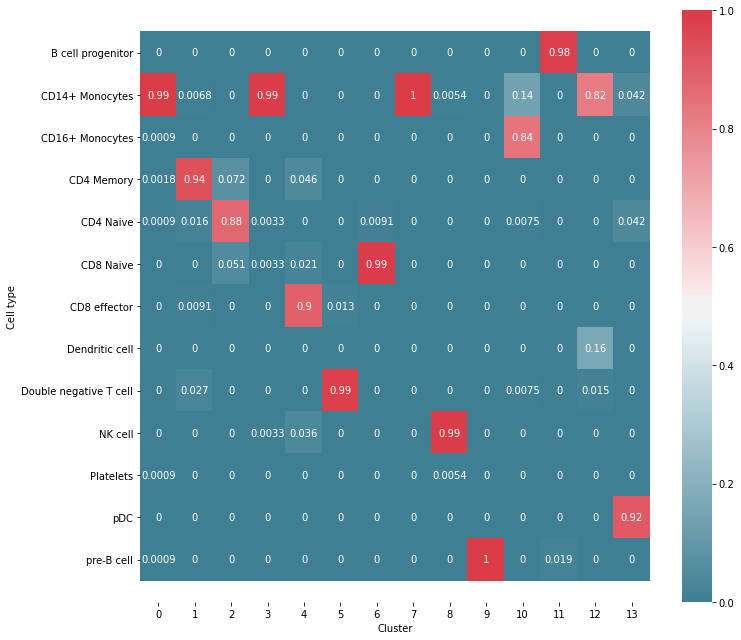

In [39]:
# sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(df, annot=True, cmap=cmap)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel("Cell type")
plt.xlabel("Cluster")
plt.tight_layout()
plt.savefig('BinaryCt_Cluster_v2.pdf')